In [10]:
import aplpy
from astropy.io import fits
from reproject import reproject_interp

import matplotlib.pyplot as plt
import numpy as np

In [12]:
spitzer_R = "/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/fits/Cygnus-X/Spitzer/M1_cygnus_2.4.fits"
spitzer_G = "/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/fits/Cygnus-X/Spitzer_fits/processed_fits/I4_2.4_reg.fits"
spitzer_B = "/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/fits/Cygnus-X/Spitzer_fits/processed_fits/I4_2.4_reg.fits"

In [3]:
R_hdu = fits.open(spitzer_R)[0]
R_header = R_hdu.header
R_data = R_hdu.data

In [4]:
def align_to_reference(input_file, output_file, reference_header):
    with fits.open(input_file) as hdul:
        # 3Dデータ（キューブ）の場合は、2Dスライスにする必要があります
        data = hdul[0].data
        if data.ndim > 2:
            data = data[0] # 最初のチャンネルなどを選択
            
        array, footprint = reproject_interp((data, hdul[0].header), reference_header)
        # output_file = outputu_file.replace(".fits", "_reprojection.fits")
        fits.writeto(output_file, array, reference_header, overwrite=True)

In [5]:
R_data.shape

(11051, 10387)

In [6]:
spitzer_zeros = np.zeros_like(R_data)
spitzer_B_aligned = spitzer_B.replace(".fits", "_reprojection_zeros.fits")
fits.writeto(spitzer_B_aligned, spitzer_zeros, R_header, overwrite=True)

In [7]:
spitzer_G_aligned = spitzer_G.replace(".fits", "_reprojection.fits")
align_to_reference(spitzer_G, spitzer_G_aligned, R_header)

In [8]:
fitss = [spitzer_R, spitzer_G_aligned, spitzer_B_aligned]

In [9]:
for path in fitss:
    with fits.open(path) as hdu:
        data = hdu[0].data
        print(data.shape)

(11051, 10387)
(11051, 10387)
(11051, 10387)


In [15]:
color_min_R = 30.0
color_max_R = 80.0
color_min_G = 30.0
color_max_G = 100.0
color_min_B = 1000000
color_max_B = 1000000
colorval = "%.1f_%.1f_%.1f_%.1f_%.1f_%.1f"%(color_min_R, color_max_R, color_min_G, color_max_G, color_min_B, color_max_B)
save_png_name = "RG_linear_linear_%s"%(colorval)+'.png'

In [16]:
fitss = [spitzer_R, spitzer_G, spitzer_B]

In [17]:
aplpy.make_rgb_image(fitss, save_png_name, 
                     vmin_r=color_min_R, 
                     vmax_r=color_max_R,
                     vmin_g=color_min_G,
                     vmax_g=color_max_G, 
                     vmin_b=color_min_B, 
                     vmax_b=color_max_B, 
                     # stretch_r="power", 
                     stretch_r="linear", 
                     # stretch_r="log", 
                     stretch_g="sqrt", 
                     # stretch_g="linear", 
                     stretch_b="sqrt")

INFO: Red: [aplpy.rgb]
INFO: vmin =  3.000e+01 [aplpy.rgb]
INFO: vmax =  8.000e+01 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  3.000e+01 [aplpy.rgb]
INFO: vmax =  1.000e+02 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  1.000e+06 [aplpy.rgb]
INFO: vmax =  1.000e+06 [aplpy.rgb]


In [14]:
save_png_name = "/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/make_figure/RG_linear_linear_30.0_80.0_30.0_100.0_1000000.0_1000000.0.png"

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (114786737 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


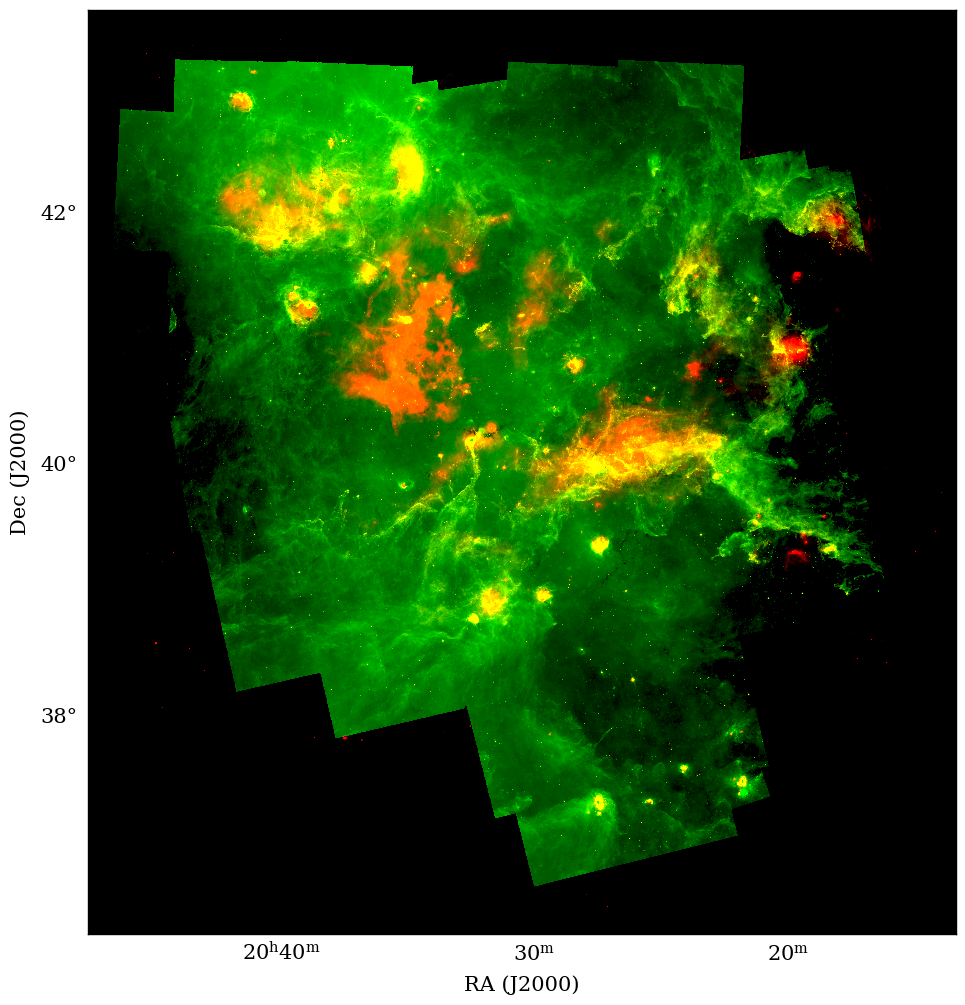